## Root Finding

due Saturday March 20, at 8 am.

In this report we will play with the roots of a continuous $f(x)$, i.e. the values of $x$ such that $f(x)=0$.

There are cases, for example if $f$ is a polynomial of degree two, where the quadratic formula is given to compute the roots of $f(x)$. 

There are however several cases where the roots cannot be computed by hand. A computational approach can be helpful in these cases, and the approximated value of the root can be computed using an iterative method, up to a desired _tolerance_.

Some famous iterative methods (that you have been shown in class) are the _Bisection method_ and the _Secant method_. Both methods need two initial points, and then proceed to iteratively reduce the interval containing the root. The bisection method keeps reducing the interval by a factor of 2, whereas the secant method uses geometry to find the slope of the secant line, and the new endpoint of the interval.

In this project we will be working with the __Newton's method__, an iterative method which (usually) guarantees a faster convergence to the root, than the bisection and secant methods.

The method works as follows:

* Given f(x), choose an initial guess for the root $x_0$

* Compute the next guess $x_{k+1} = x_{k} - \dfrac{f(x_{k})}{f'(x_k)}$ for $k\geq 0,\qquad$ ( $f'(x)$ is the derivative of $f(x)$ )

* We stop when $|x_{k+1}-x_k| < \text{tol}$. In this case we say the method converged to a root.


Here is an example of the method applied to the function $f(x)=x^2-5x+4$, starting with $x_0=2.3$

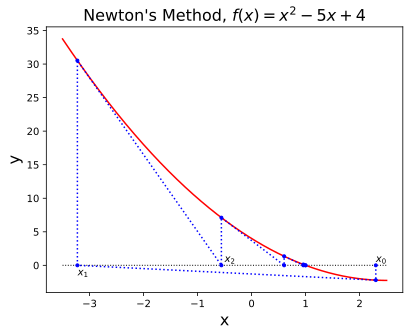

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 -5 *x +4

def fp(x):
    return 2*x - 5

def newton(x0,f,fp):
    x1 = x0 - f(x0)/fp(x0)
    return x1

x = [2.3,2.3]
y = [0,f(x[0])]

for k in range(5):
    xtmp = newton(x[2*k],f,fp)
    x.append(xtmp)
    y.append(0)
    x.append(xtmp)
    y.append(f(xtmp))
#print(x,y)
    
xv=np.linspace(-3.5,2.5,1001)
plt.plot([-3.5,2.5],[0,0],'k:',lw=1)
plt.plot(xv,f(xv),'r')
plt.plot(x,y,'b:.');
plt.text(2.3,0.5,'$x_0$')    
plt.text(-3.22,-1.5,'$x_1$')
plt.text(-0.5,0.5,'$x_2$')
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.title("Newton's Method, $f(x)=x^2-5x+4$",fontsize=16)
plt.savefig('image1.png')

![figure_1](image1.png "")

The choice of the initial guess $x_0$ is very important for the success of Newton's method, and it can be explored computing the approximated root over a range of initial guesses, as displayed below

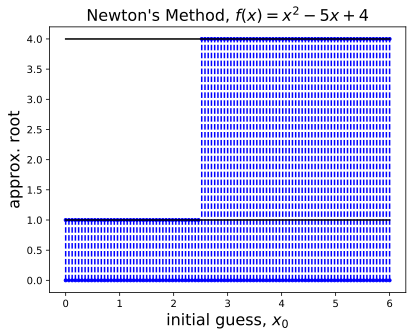

In [2]:
n=100
x = np.linspace(0,6,n+1)

roots = [1,4]
x0=x

for k in range(100):
    x1=newton(x0,f,fp)
    x0=x1

for k in range(n+1):
    plt.plot([x[k],x[k]],[0,x1[k]],'b--.');
plt.plot([0,6],[1,1],'k');
plt.plot([0,6],[4,4],'k');
plt.xlabel('initial guess, $x_0$',fontsize=16)
plt.ylabel('approx. root',fontsize=16)
plt.title("Newton's Method, $f(x)=x^2-5x+4$",fontsize=16)
plt.savefig('image2.png')

![figure_2](image2.png "")

<font size="+2"> **Project:** </font>

For each of the following parts, implement the code and comment the results obtained.

**Part 1**

* Define function `newton` that computes one iteration of Newton's method 

* Apply Newton's method to the function $f(x)=x^3 - 7 x^2 + 12x$, and obtain a graph that display the approximates solution computed using Newton's method as a function of the initial guess. (For this step you do not need to check for convergence; you can just run Newton's method for 100 iterations and display the final result found by the method)

**Part 2: Complex roots**

* Use Newton's method to find which root different points in a rectangular portion of the complex
plane converge to for the equation $f(z) = z^3 - 1$.

* Color the points in this region according to which root they converge to 

* Make some additional zoomed in pictures of some interesting region.

**Part 3: Complex roots**


* Display the convergence to the roots of other functions of the form $f(z) = z^n - 1$, where $n$ is integer

**Part 4: Bonus**

Make a picture encoding the number of iterations needed to converge in the brightness of the color, for one or more of the equations in part 2 and 3